In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pyfftw as ft
import time
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
nx = 1024
ny = 1024

In [3]:
X = np.zeros((nx,ny))
Y = np.zeros((nx,ny))
for i in range(nx):
    X[i,:] = 2.*np.pi*float(i/nx)
    
for j in range(ny):
    Y[:,j] = 2.*np.pi*float(j/ny)

In [4]:
def carpet(x,y,lvl):
    taint = 0
    lx = x/(2.*np.pi)
    ly = y/(2.*np.pi)
    for k in range(lvl):
        digx = math.floor(3*lx)
        digy = math.floor(3*ly)
        if (digx==1)&(digy==1):
            return 0
        lx = (3.*lx-digx)
        ly = (3.*ly-digy)
    
    return 1

In [5]:
vcarpet = np.vectorize(carpet)

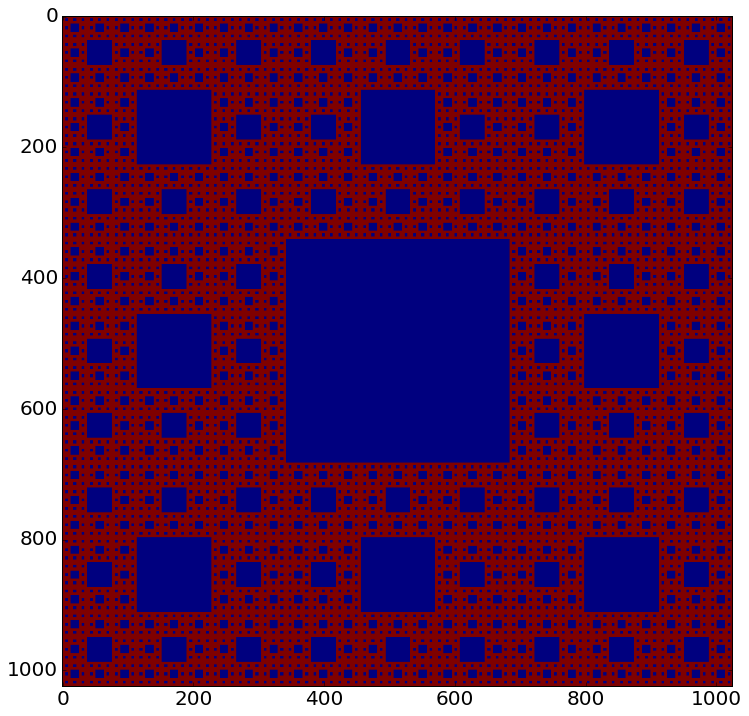

In [37]:
chi = vcarpet(X,Y,5)
plt.figure(figsize=(12,12))
plt.imshow(chi)

In [38]:
vFrac = np.sum(chi)
#nchi = chi/vFrac

In [39]:
cchi = np.fft.rfft2(chi)
tmp = cchi*(cchi.conj())
corr = np.fft.irfft2(tmp)

In [40]:
print(corr)

[[ 582975.  555622.  528269. ...,  500916.  528269.  555622.]
 [ 555622.  532950.  510278. ...,  487606.  510278.  532950.]
 [ 528269.  510278.  492287. ...,  474296.  492287.  510278.]
 ..., 
 [ 500916.  487606.  474296. ...,  460986.  474296.  487606.]
 [ 528269.  510278.  492287. ...,  474296.  492287.  510278.]
 [ 555622.  532950.  510278. ...,  487606.  510278.  532950.]]


In [41]:
iCorr = np.zeros((nx//2,ny//2))

In [42]:
iCorr[0:(nx//2),0:(nx//2)] = corr[0:(nx//2),0:(nx//2)]

In [43]:
print(iCorr.shape)

(512, 512)


In [44]:
Xr = np.zeros((nx//2,ny//2))
Yr = np.zeros((nx//2,ny//2))
for i in range(nx//2):
    Xr[i,:] = 2.*np.pi*float(i/nx)
    
for j in range(ny//2):
    Yr[:,j] = 2.*np.pi*float(j/ny)
    
r2 = Xr**2+Yr**2
r2rt = np.sqrt(r2)

minrt = np.min(r2rt)
maxrt = np.max(r2rt)
print(minrt,maxrt)

0.0 4.43420543242


In [45]:
dx = (2.*np.pi)/nx
ner = int((nx//2)*np.sqrt(2))
rbins = np.linspace(minrt,maxrt,1+ner)

In [46]:
rCorr,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
r2,r2edges   = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)

In [47]:
cbins = (rbins[0:ner]+rbins[1:ner+1])/2

In [48]:
print(rCorr.shape)
print(r2)

(724,)
[  1   3   5   6   7  11  10  13  15  15  18  17  21  24  23  25  24  31
  29  33  32  37  35  36  39  41  47  42  43  47  50  51  51  50  61  55
  59  56  63  65  62  67  63  73  70  73  75  74  79  75  76  89  81  87
  82  85  97  88  95  89 101  98  93 101 102 109 103 100 109 113 117 110
 113 119 114 121 119 123 126 123 129 126 129 135 126 139 143 135 136 141
 151 138 147 145 145 158 147 157 152 159 159 152 167 161 169 168 163 169
 172 177 169 171 182 179 181 180 189 181 182 189 189 197 188 197 191 202
 201 193 205 208 205 209 200 213 217 208 217 209 227 216 223 219 226 227
 223 229 230 233 241 226 239 241 232 247 235 257 242 247 251 248 259 249
 255 258 253 265 258 259 279 258 271 259 281 280 267 273 276 281 279 281
 282 287 295 280 287 299 284 303 283 307 300 299 309 292 313 307 301 312
 309 329 304 313 325 314 327 313 325 328 329 329 324 343 333 343 328 331
 343 346 347 341 340 353 341 353 354 361 353 352 365 355 365 358 367 373
 366 367 365 384 379 363 381 376 387 383 374

This power law is equivalent to have a 'Excursion Dimension' of $D_E = 1.90(3) - 1.91(3)$, with uncertainty in the second decimal figure. This higher than, though compatible with, the usual fractal dimension for the sierpinsky carpet of $D_F = \frac{\log 8}{\log 3} \approx 1.8928$, so I have no clear conclusion out of this. 

[ 0.90319842  4.98150052]


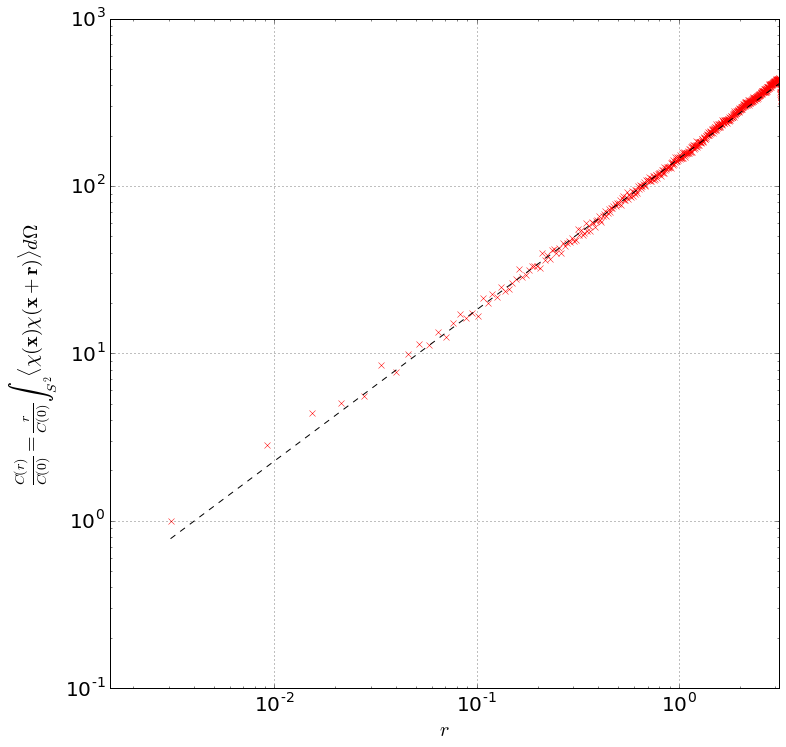

In [49]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.figure(figsize=(12,12))
plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{r}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)

plt.xlim(minrt+dx/4,np.pi)

tempRp = cbins[(cbins>0.1)&(cbins<1)]
tempCorr = rCorr[(cbins>0.1)&(cbins<1)]/rCorr[0]
fit = np.polyfit(np.log(tempRp),np.log(tempCorr),1)
print(fit)

plt.grid()
plt.loglog(cbins,(rCorr)/(rCorr[0]),'rx')
plt.loglog(cbins,np.exp(fit[1])*(cbins**(fit[0])),'k--')

[-0.0868158  -0.56367427]


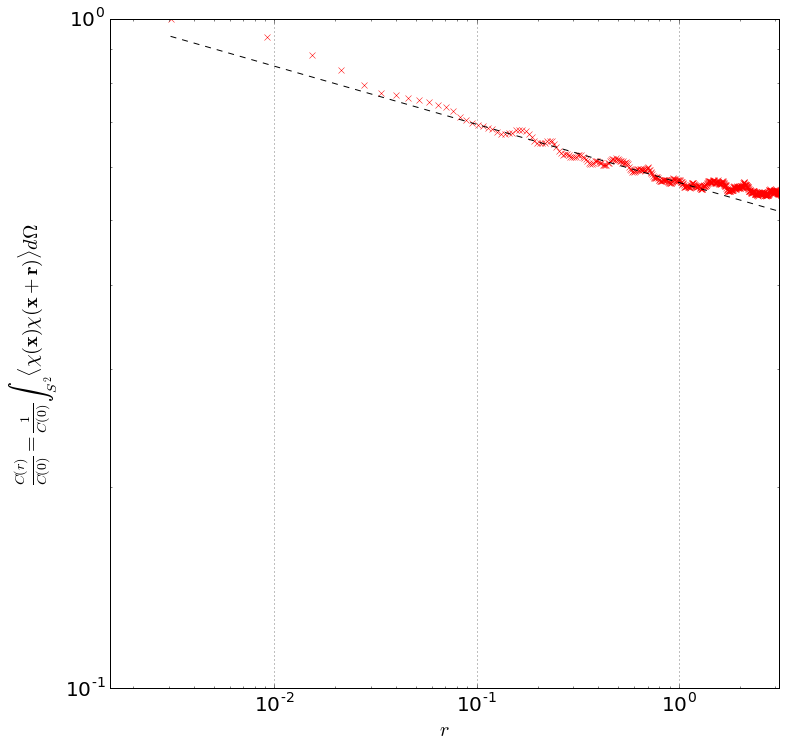

In [52]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.figure(figsize=(12,12))
plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{1}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)

plt.xlim(minrt+dx/4,np.pi)

tempRp = cbins[(cbins>0.1)&(cbins<1)]
tempCorr = (rCorr[(cbins>0.1)&(cbins<1)]/rCorr[0])/(r2[(cbins>0.1)&(cbins<1)]/r2[0])
fit = np.polyfit(np.log(tempRp),np.log(tempCorr),1)
print(fit)

plt.grid()
plt.loglog(cbins,(rCorr/r2)/(rCorr[0]/r2[0]),'rx')
plt.loglog(cbins,np.exp(fit[1])*(cbins**(fit[0])),'k--')

In [28]:
chi[:,:] = 1
cchi = np.fft.rfft2(chi)
tmp = cchi*(cchi.conj())
corr = np.fft.irfft2(tmp)
iCorr = np.zeros((nx//2,ny//2))
iCorr[0:(nx//2),0:(nx//2)] = corr[0:(nx//2),0:(nx//2)]
rCorr,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
r2,r2edges   = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)

In [32]:
print(iCorr)

[[ 1048576.  1048576.  1048576. ...,  1048576.  1048576.  1048576.]
 [ 1048576.  1048576.  1048576. ...,  1048576.  1048576.  1048576.]
 [ 1048576.  1048576.  1048576. ...,  1048576.  1048576.  1048576.]
 ..., 
 [ 1048576.  1048576.  1048576. ...,  1048576.  1048576.  1048576.]
 [ 1048576.  1048576.  1048576. ...,  1048576.  1048576.  1048576.]
 [ 1048576.  1048576.  1048576. ...,  1048576.  1048576.  1048576.]]


[ 0.99001421  5.54517479]


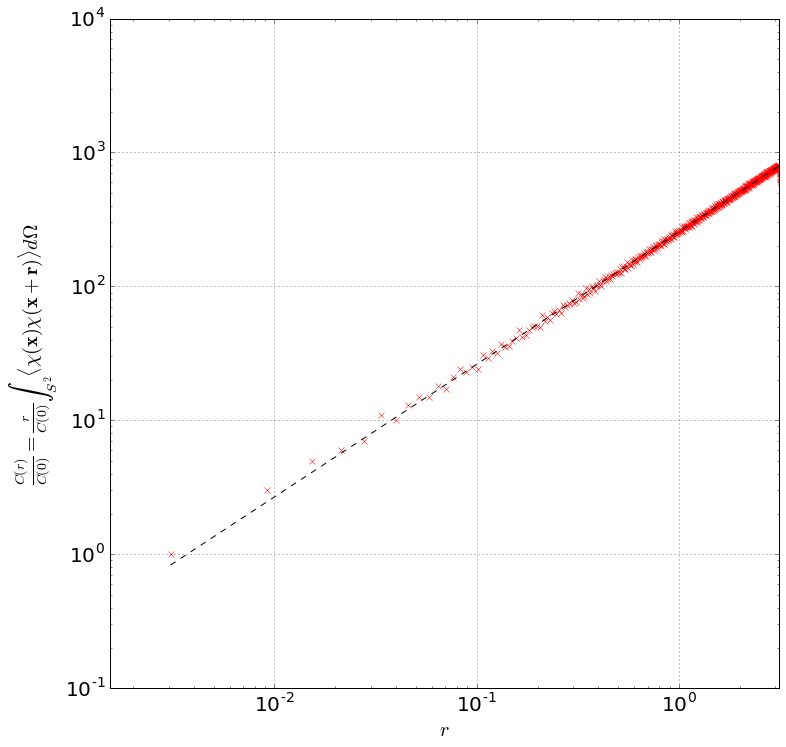

In [36]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.figure(figsize=(12,12))
plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{r}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)

plt.xlim(minrt+dx/4,np.pi)

tempRp = cbins[(cbins>0.1)&(cbins<1)]
tempCorr = rCorr[(cbins>0.1)&(cbins<1)]/rCorr[0]
fit = np.polyfit(np.log(tempRp),np.log(tempCorr),1)
print(fit)

plt.grid()
plt.loglog(cbins,(rCorr)/(rCorr[0]),'rx')
plt.loglog(cbins,np.exp(fit[1])*(cbins**(fit[0])),'k--')